<h1><center>Master of Business Analytics Thesis <br>Feature Importance Study for HSE variables on board of rigs</center></h1>
<h2><center>Notebook: Models</center></h2>

## Table of Contents

* [Section 1](#section1): Dummy Variable Trap
* [Section 2](#section2): Split dataset into training and test
* [Section 3](#section3): Feature Scaling
    * [3.1](#3_1): Normalize
    * [3.2](#3_2): Standardization
* [Section 4](#section4): Linear Regression for all positions
    * [4.1](#4_1): Visualization linear relationship 
    * [4.2](#4_2): Formula
    * [4.3](#4_3): Model
    * [4.4](#4_4): Ridge Regression all positions
    * [4.5](#4_5): Lasso Regression all positions
* [Section 5](#section5): Linear Regression with Rig Managers data only
    * [5.1](#5_1): Visualization linear relationship 
    * [5.2](#5_2): Formula
    * [5.3](#5_3): Model
    * [5.4](#5_4): Ridge Regression Rig Managers only
    * [5.5](#5_5): Lasso Regression Rig Managers only
* [Section 6](#section6): Decision Tree Regressor for all positions 
    * [6.1](#6_1): Hyperparameter tuning
* [Section 7](#section7): Decision Tree Regressor with Rig Managers data only 
    * [7.1](#7_1): Hyperparameter tuning
* [Section 8](#section8): Random Forest Regressor for all positions
    * [8.1](#8_1): Hyperparameter tuning
* [Section 9](#section9): Random Forest Regressor with Rig Managers data only
    * [9.1](#9_1): Hyperparameter tuning
* [Section 10](#section10): XGBoost Regressor for all positions
    * [10.1](#10_1): Hyperparameter tuning
* [Section 11](#section11): XGBoost Regressor with Rig Managers data only
    * [11.1](#11_1): Hyperparameter tuning
* [Section 12](#section12): Voting Regressor for all positions
* [Section 13](#section13): Voting Regressor with Rig Managers data only
    

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import plotly.io as pio
import plotly.graph_objects as go
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

#printing all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Suppressing warnings
import warnings
warnings.simplefilter(action = "ignore")


In [2]:
#Importing cleaned datasets
df_extra = pd.read_csv("./Datasets/Pre_processing_extra_done.csv", index_col = 0)
df_extra



,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,Oceania_120d,...,Operator_Services_120d_percentage,Other_120d_percentage,Days_Worked,Total_Cards,Alpha,Beta,Report_per_Day,Day_120d,Night_120d,Incidents_per_1000
6,2021,2021-04,16506.0,16506.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.331698,0.000061,22274.0,8023.0,-0.706365,0.445779,0.559251,7028.0,2203.0,0.060584
7,2021,2021-05,16512.0,16512.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337270,0.000061,22095.0,13358.0,-0.469006,0.541805,0.927386,11863.0,3450.0,0.000000
8,2021,2021-06,17206.0,17206.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.345054,0.000058,21991.0,18382.0,-0.185492,0.582899,1.077647,14460.0,4082.0,0.058119
9,2021,2021-07,16726.0,16726.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.331221,0.000000,21761.0,20697.0,-0.003215,0.540605,1.084659,14484.0,3658.0,0.059787
10,2021,2021-08,16384.0,16384.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.326355,0.000000,21672.0,20468.0,-0.001977,0.511881,1.114380,15092.0,3166.0,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,0.0,10313.0,0.0,0.0,0.0,0.0,10313.0,...,0.332881,0.000000,13618.0,11161.0,-0.135877,0.700201,0.903908,8163.0,1159.0,0.484825
342,2021,2021-12,10521.0,0.0,10521.0,0.0,0.0,0.0,0.0,10521.0,...,0.351297,0.000000,13683.0,11089.0,-0.160332,0.690719,0.870735,8087.0,1074.0,0.570288
343,2022,2022-01,9172.0,0.0,9172.0,0.0,0.0,0.0,0.0,9172.0,...,0.303096,0.013083,12413.0,9767.0,-0.214469,0.746363,0.840057,6735.0,970.0,0.545137
344,2022,2022-02,8609.0,0.0,8609.0,0.0,0.0,0.0,0.0,8609.0,...,0.273435,0.036125,11838.0,9359.0,-0.245051,0.715332,0.818678,5935.0,1113.0,0.580788


In [3]:
df_extra.columns.tolist()

['year',
 'month_year',
 'Working_Days_per_month_120d',
 'DS_120d',
 'JU_120d',
 'NPSS_120d',
 'Europe_and_Mediterranean_120d',
 'Far_East_120d',
 'Middle_East_and_India_120d',
 'Oceania_120d',
 'South_America_120d',
 'United_States_120d',
 'Noble_Company_120d',
 'Rig_Manager_120d',
 'Catering_120d_percentage',
 'Noble_Expat_120d_percentage',
 'Noble_National_120d_percentage',
 'Noble_Personnel_120d_percentage',
 'Noble_Services_120d_percentage',
 'Cat_Type_Operator_120d_percentage',
 'Operator_Services_120d_percentage',
 'Other_120d_percentage',
 'Days_Worked',
 'Total_Cards',
 'Alpha',
 'Beta',
 'Report_per_Day',
 'Day_120d',
 'Night_120d',
 'Incidents_per_1000']

### Make the separate extra df

In [4]:
## For the shifts Day and Night
df_shift = df_extra[['year','month_year','Working_Days_per_month_120d','Day_120d','Night_120d','Incidents_per_1000']]
df_shift


## For the region 
df_region = df_extra[['year','month_year','Working_Days_per_month_120d',
                     'Europe_and_Mediterranean_120d','Far_East_120d',
                     'Middle_East_and_India_120d', 'Oceania_120d',
                     'United_States_120d','Incidents_per_1000','Alpha']]
df_region

## For the type of employees
df_employees = df_extra[['year','month_year','Working_Days_per_month_120d',
                         'Catering_120d_percentage','Noble_Expat_120d_percentage',
                         'Noble_National_120d_percentage','Noble_Personnel_120d_percentage',
                         'Noble_Services_120d_percentage',
                         'Operator_Services_120d_percentage','Other_120d_percentage',
                         'Incidents_per_1000']]

df_employees

## For the different rig types existing
df_rig_type = df_extra[['year','month_year','Working_Days_per_month_120d',
                        'DS_120d','JU_120d','NPSS_120d','Incidents_per_1000']]
df_rig_type



,year,month_year,Working_Days_per_month_120d,Day_120d,Night_120d,Incidents_per_1000
6,2021,2021-04,16506.0,7028.0,2203.0,0.060584
7,2021,2021-05,16512.0,11863.0,3450.0,0.000000
8,2021,2021-06,17206.0,14460.0,4082.0,0.058119
9,2021,2021-07,16726.0,14484.0,3658.0,0.059787
10,2021,2021-08,16384.0,15092.0,3166.0,0.061035
...,...,...,...,...,...,...
341,2021,2021-11,10313.0,8163.0,1159.0,0.484825
342,2021,2021-12,10521.0,8087.0,1074.0,0.570288
343,2022,2022-01,9172.0,6735.0,970.0,0.545137
344,2022,2022-02,8609.0,5935.0,1113.0,0.580788


,year,month_year,Working_Days_per_month_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,Oceania_120d,United_States_120d,Incidents_per_1000,Alpha
6,2021,2021-04,16506.0,0.0,0.0,0.0,0.0,0.0,0.060584,-0.706365
7,2021,2021-05,16512.0,0.0,0.0,0.0,0.0,0.0,0.000000,-0.469006
8,2021,2021-06,17206.0,0.0,0.0,0.0,0.0,0.0,0.058119,-0.185492
9,2021,2021-07,16726.0,0.0,0.0,0.0,0.0,0.0,0.059787,-0.003215
10,2021,2021-08,16384.0,0.0,0.0,0.0,0.0,0.0,0.061035,-0.001977
...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,0.0,0.0,0.0,10313.0,0.0,0.484825,-0.135877
342,2021,2021-12,10521.0,0.0,0.0,0.0,10521.0,0.0,0.570288,-0.160332
343,2022,2022-01,9172.0,0.0,0.0,0.0,9172.0,0.0,0.545137,-0.214469
344,2022,2022-02,8609.0,0.0,0.0,0.0,8609.0,0.0,0.580788,-0.245051


,year,month_year,Working_Days_per_month_120d,Catering_120d_percentage,Noble_Expat_120d_percentage,Noble_National_120d_percentage,Noble_Personnel_120d_percentage,Noble_Services_120d_percentage,Operator_Services_120d_percentage,Other_120d_percentage,Incidents_per_1000
6,2021,2021-04,16506.0,0.094996,0.208530,0.145765,0.157700,0.014177,0.331698,0.000061,0.060584
7,2021,2021-05,16512.0,0.093508,0.203307,0.153464,0.161579,0.007934,0.337270,0.000061,0.000000
8,2021,2021-06,17206.0,0.091131,0.199930,0.151226,0.167209,0.006567,0.345054,0.000058,0.058119
9,2021,2021-07,16726.0,0.092670,0.203097,0.134581,0.189286,0.012137,0.331221,0.000000,0.059787
10,2021,2021-08,16384.0,0.091980,0.218933,0.118896,0.196472,0.011169,0.326355,0.000000,0.061035
...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,0.100359,0.067100,0.000000,0.426355,0.003006,0.332881,0.000000,0.484825
342,2021,2021-12,10521.0,0.098565,0.062827,0.002946,0.411938,0.001521,0.351297,0.000000,0.570288
343,2022,2022-01,9172.0,0.099106,0.052333,0.030201,0.433384,0.001962,0.303096,0.013083,0.545137
344,2022,2022-02,8609.0,0.091416,0.028342,0.059705,0.437217,0.003949,0.273435,0.036125,0.580788


,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Incidents_per_1000
6,2021,2021-04,16506.0,16506.0,0.0,0.0,0.060584
7,2021,2021-05,16512.0,16512.0,0.0,0.0,0.000000
8,2021,2021-06,17206.0,17206.0,0.0,0.0,0.058119
9,2021,2021-07,16726.0,16726.0,0.0,0.0,0.059787
10,2021,2021-08,16384.0,16384.0,0.0,0.0,0.061035
...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,0.0,10313.0,0.0,0.484825
342,2021,2021-12,10521.0,0.0,10521.0,0.0,0.570288
343,2022,2022-01,9172.0,0.0,9172.0,0.0,0.545137
344,2022,2022-02,8609.0,0.0,8609.0,0.0,0.580788


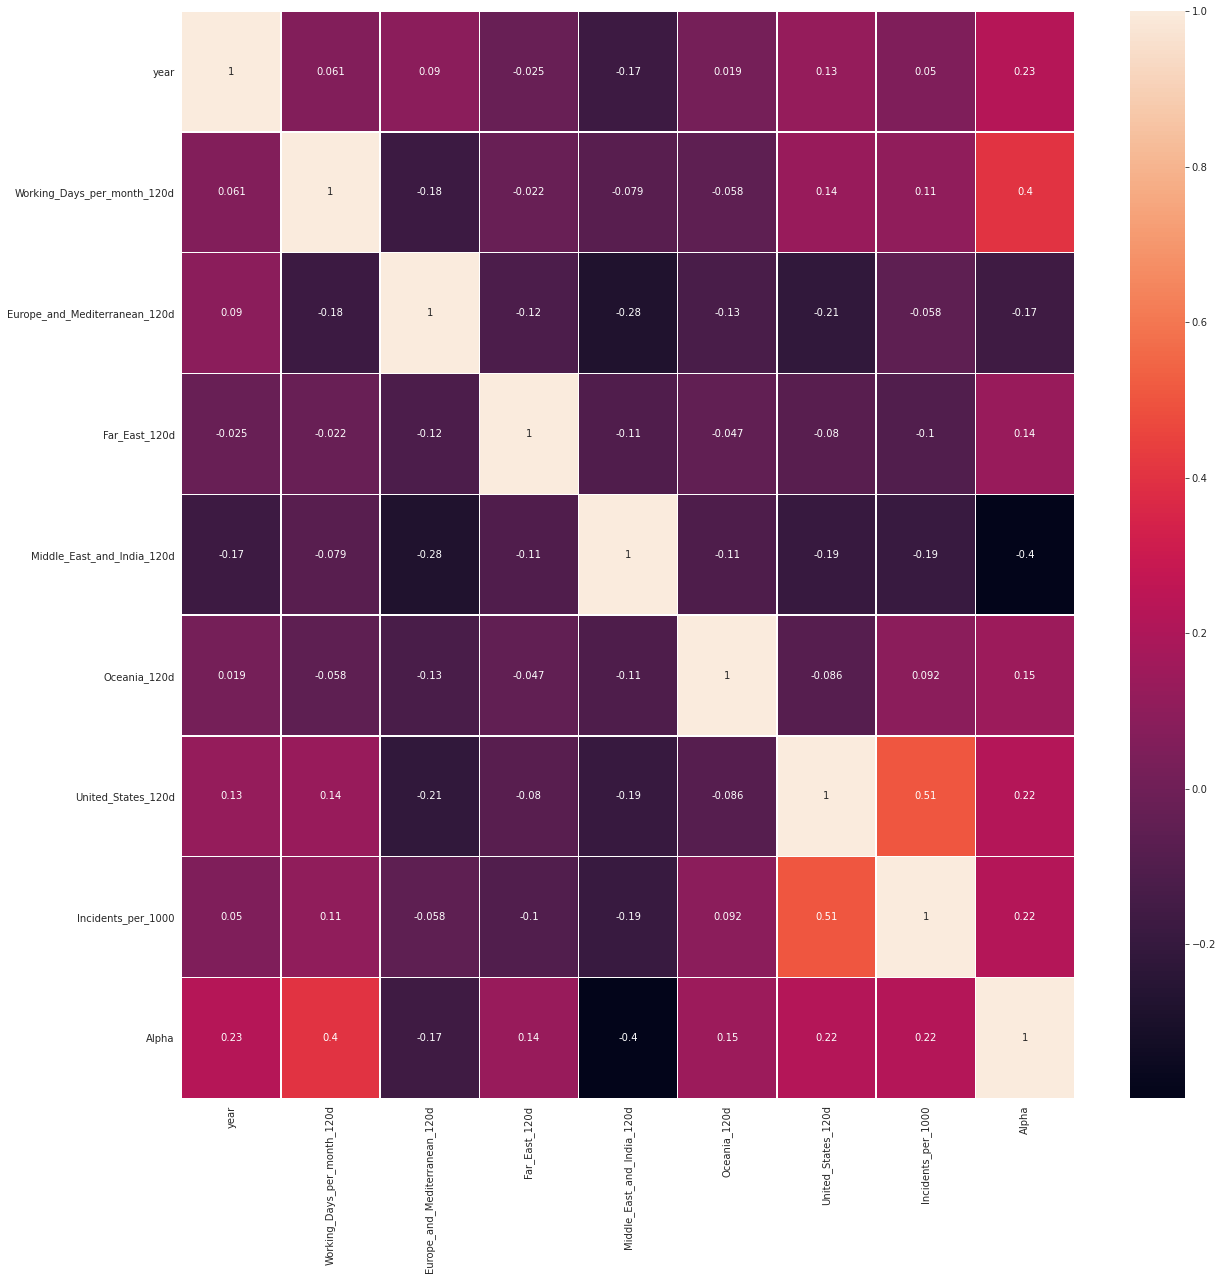

In [5]:
corrMatrix = df_region.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True, linewidths=.5)
plt.show();

## Dummy Variable Trap <a class="anchor" id="section1"></a> 
To avoid dummy variable trap, we need to drop one of the three columns for the risk percentages.

In [6]:
df_extra = df_extra.drop(columns={"NPSS_120d","South_America_120d"})
df_employees = df_employees.drop(columns={"Noble_Expat_120d_percentage"})


After running the models, some columns need to be dropped as they have very small significance or they seem to be correlated with other columns.

In [7]:
df_extra = df_extra.drop(columns={'Days_Worked','Total_Cards','Report_per_Day'})


## Split dataset into training and test <a class="anchor" id="section2"></a> 

In [8]:
df_shift = df_shift.sort_values("month_year").reset_index(drop=True)
df_shift['month_year'] = pd.to_datetime(df_shift['month_year']).dt.month
df_shift

df_region = df_region.sort_values("month_year").reset_index(drop=True)
df_region['month_year'] = pd.to_datetime(df_region['month_year']).dt.month
df_region

df_employees = df_employees.sort_values("month_year").reset_index(drop=True)
df_employees['month_year'] = pd.to_datetime(df_employees['month_year']).dt.month
df_employees

df_rig_type = df_rig_type.sort_values("month_year").reset_index(drop=True)
df_rig_type['month_year'] = pd.to_datetime(df_rig_type['month_year']).dt.month
df_rig_type


,year,month_year,Working_Days_per_month_120d,Day_120d,Night_120d,Incidents_per_1000
0,2021,1,3118.0,278.0,8.0,0.320718
1,2021,1,4252.0,388.0,35.0,0.470367
2,2021,1,8533.0,938.0,453.0,0.000000
3,2021,1,1924.0,1129.0,73.0,0.000000
4,2021,1,8016.0,1929.0,383.0,0.374251
...,...,...,...,...,...,...
257,2022,3,8649.0,1382.0,880.0,0.231241
258,2022,3,11599.0,3250.0,1353.0,0.000000
259,2022,3,14407.0,5122.0,1786.0,0.208232
260,2022,3,15859.0,11878.0,5094.0,0.000000


,year,month_year,Working_Days_per_month_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,Oceania_120d,United_States_120d,Incidents_per_1000,Alpha
0,2021,1,3118.0,3118.0,0.0,0.0,0.0,0.0,0.320718,-1.403011
1,2021,1,4252.0,0.0,0.0,0.0,4252.0,0.0,0.470367,-1.456854
2,2021,1,8533.0,0.0,0.0,8533.0,0.0,0.0,0.000000,-1.527818
3,2021,1,1924.0,0.0,1924.0,0.0,0.0,0.0,0.000000,-0.888678
4,2021,1,8016.0,0.0,0.0,8016.0,0.0,0.0,0.374251,-1.429726
...,...,...,...,...,...,...,...,...,...,...
257,2022,3,8649.0,8649.0,0.0,0.0,0.0,0.0,0.231241,-0.916946
258,2022,3,11599.0,0.0,0.0,0.0,0.0,11599.0,0.000000,-0.871201
259,2022,3,14407.0,0.0,0.0,0.0,0.0,14407.0,0.208232,-0.662724
260,2022,3,15859.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.092534


,year,month_year,Working_Days_per_month_120d,Catering_120d_percentage,Noble_National_120d_percentage,Noble_Personnel_120d_percentage,Noble_Services_120d_percentage,Operator_Services_120d_percentage,Other_120d_percentage,Incidents_per_1000
0,2021,1,3118.0,0.116421,0.000000,0.849904,0.011546,0.022130,0.000000,0.320718
1,2021,1,4252.0,0.091486,0.001646,0.477658,0.016698,0.230715,0.000000,0.470367
2,2021,1,8533.0,0.153522,0.363061,0.061174,0.053088,0.199930,0.000000,0.000000
3,2021,1,1924.0,0.143451,0.000000,0.000000,0.020270,0.000000,0.247921,0.000000
4,2021,1,8016.0,0.163423,0.376123,0.089446,0.059256,0.134481,0.000000,0.374251
...,...,...,...,...,...,...,...,...,...,...
257,2022,3,8649.0,0.082669,0.000000,0.490114,0.023818,0.290901,0.046017,0.231241
258,2022,3,11599.0,0.114062,0.000000,0.529011,0.113458,0.200017,0.000000,0.000000
259,2022,3,14407.0,0.105782,0.000000,0.469841,0.006039,0.269105,0.099604,0.208232
260,2022,3,15859.0,0.096097,0.126301,0.228009,0.004981,0.315909,0.003216,0.000000


,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Incidents_per_1000
0,2021,1,3118.0,0.0,3118.0,0.0,0.320718
1,2021,1,4252.0,0.0,4252.0,0.0,0.470367
2,2021,1,8533.0,0.0,8533.0,0.0,0.000000
3,2021,1,1924.0,0.0,0.0,1924.0,0.000000
4,2021,1,8016.0,0.0,8016.0,0.0,0.374251
...,...,...,...,...,...,...,...
257,2022,3,8649.0,0.0,8649.0,0.0,0.231241
258,2022,3,11599.0,11599.0,0.0,0.0,0.000000
259,2022,3,14407.0,14407.0,0.0,0.0,0.208232
260,2022,3,15859.0,15859.0,0.0,0.0,0.000000


In [9]:
df_extra = df_extra.sort_values("month_year").reset_index(drop=True)
df_extra['month_year'] = pd.to_datetime(df_extra['month_year']).dt.month
df_extra


,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,Oceania_120d,United_States_120d,...,Noble_Personnel_120d_percentage,Noble_Services_120d_percentage,Cat_Type_Operator_120d_percentage,Operator_Services_120d_percentage,Other_120d_percentage,Alpha,Beta,Day_120d,Night_120d,Incidents_per_1000
0,2021,1,3118.0,0.0,3118.0,3118.0,0.0,0.0,0.0,0.0,...,0.849904,0.011546,0.000000,0.022130,0.000000,-1.403011,0.300586,278.0,8.0,0.320718
1,2021,1,4252.0,0.0,4252.0,0.0,0.0,0.0,4252.0,0.0,...,0.477658,0.016698,0.032455,0.230715,0.000000,-1.456854,0.117331,388.0,35.0,0.470367
2,2021,1,8533.0,0.0,8533.0,0.0,0.0,8533.0,0.0,0.0,...,0.061174,0.053088,0.053322,0.199930,0.000000,-1.527818,0.034305,938.0,453.0,0.000000
3,2021,1,1924.0,0.0,0.0,0.0,1924.0,0.0,0.0,0.0,...,0.000000,0.020270,0.000000,0.000000,0.247921,-0.888678,0.585522,1129.0,73.0,0.000000
4,2021,1,8016.0,0.0,8016.0,0.0,0.0,8016.0,0.0,0.0,...,0.089446,0.059256,0.052021,0.134481,0.000000,-1.429726,0.187718,1929.0,383.0,0.374251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2022,3,8649.0,0.0,8649.0,8649.0,0.0,0.0,0.0,0.0,...,0.490114,0.023818,0.066482,0.290901,0.046017,-0.916946,0.352403,1382.0,880.0,0.231241
258,2022,3,11599.0,11599.0,0.0,0.0,0.0,0.0,0.0,11599.0,...,0.529011,0.113458,0.043452,0.200017,0.000000,-0.871201,0.372203,3250.0,1353.0,0.000000
259,2022,3,14407.0,14407.0,0.0,0.0,0.0,0.0,0.0,14407.0,...,0.469841,0.006039,0.049629,0.269105,0.099604,-0.662724,0.524007,5122.0,1786.0,0.208232
260,2022,3,15859.0,15859.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.228009,0.004981,0.036068,0.315909,0.003216,0.092534,0.511203,11878.0,5094.0,0.000000


In [10]:
#After a first trial, these columns don't give any importance to the models
df_extra = df_extra.drop(columns={"year","month_year"})
df_shift = df_shift.drop(columns={"year","month_year"})
df_region = df_region.drop(columns={"year","month_year"})
df_employees = df_employees.drop(columns={"year","month_year"})
df_rig_type = df_rig_type.drop(columns={"year","month_year"})

In [11]:
# train set is for 12 months where test set is for 3 months
test_size = 53

df_train = df_shift[:-test_size]
df_test = df_shift[-test_size:]

# the label for this model will be Incidents_per_1000
x_train = df_train.drop(columns=["Incidents_per_1000"])
y_train = df_train["Incidents_per_1000"].copy()
x_test = df_test.drop(columns=["Incidents_per_1000"])
y_test = df_test["Incidents_per_1000"].copy()




Now that the test and train sets are there, we need to split them into data and label. The label is our y value which will only contain the number of events as this is what we want to predict. The data is our x values which are all the other attributes.


In [12]:
# Dataset including all positions variables
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)
print('Observations: %d' % (len(df_shift)))
print('Training Observations: %d' % (len(x_train)))
print('Testing Observations: %d' % (len(x_test)))

print(len(df_train), "train +", len(df_test), "test")

x_train 
x_test
y_train
y_test



Training dataset shape: (209, 3) (209,)
Testing dataset shape: (53, 3) (53,)
Observations: 262
Training Observations: 209
Testing Observations: 53
209 train + 53 test


,Working_Days_per_month_120d,Day_120d,Night_120d
0,3118.0,278.0,8.0
1,4252.0,388.0,35.0
2,8533.0,938.0,453.0
3,1924.0,1129.0,73.0
4,8016.0,1929.0,383.0
...,...,...,...
204,16987.0,14848.0,4401.0
205,1862.0,765.0,62.0
206,9513.0,6682.0,1905.0
207,16020.0,10448.0,4046.0


,Working_Days_per_month_120d,Day_120d,Night_120d
209,16225.0,12088.0,4318.0
210,10123.0,7475.0,2759.0
211,17130.0,9202.0,4345.0
212,9172.0,6735.0,970.0
213,13921.0,6106.0,2173.0
214,10247.0,7827.0,2162.0
215,8759.0,1515.0,980.0
216,1833.0,733.0,51.0
217,12460.0,1363.0,518.0
218,8452.0,6801.0,2055.0


0      0.320718
1      0.470367
2      0.000000
3      0.000000
4      0.374251
         ...   
204    0.235474
205    0.000000
206    0.105119
207    0.436954
208    0.143205
Name: Incidents_per_1000, Length: 209, dtype: float64

209    0.246533
210    0.000000
211    0.175131
212    0.545137
213    0.287336
214    0.097590
215    0.342505
216    0.000000
217    0.160514
218    0.118315
219    0.058326
220    0.288517
221    0.432760
222    0.348724
223    0.967212
224    0.487567
225    0.452967
226    0.000000
227    0.341997
228    0.000000
229    0.062976
230    0.094331
231    0.350484
232    0.086415
233    0.000000
234    0.178902
235    0.580788
236    1.077296
237    0.336852
238    0.158265
239    0.151035
240    0.585594
241    0.173521
242    0.000000
243    0.552853
244    0.189119
245    0.000000
246    0.000000
247    0.167983
248    0.791139
249    0.130480
250    0.212404
251    0.108566
252    0.324535
253    0.099325
254    0.000000
255    0.157394
256    0.000000
257    0.231241
258    0.000000
259    0.208232
260    0.000000
261    0.520562
Name: Incidents_per_1000, dtype: float64

## Feature Scaling <a class="anchor" id="section3"></a>

### Normalize <a class="anchor" id="3_1"></a>

In [13]:
from functions import normalize_func
normalize_func(x_train,x_test)


### Standardization <a class="anchor" id="3_2"></a>

In [14]:
# from sklearn.preprocessing import StandardScaler

# std_scaler = StandardScaler()

# x_train_columns = x_train.columns.tolist()
# x_test_columns = x_test.columns.tolist()

# x_train[x_train_columns] = std_scaler.fit_transform(x_train[x_train_columns])
# x_test[x_test_columns] = std_scaler.transform(x_test[x_test_columns])




In [15]:
#for region drop "Middle_East_and_India_120d"
#x_train = x_train.drop(columns={"Middle_East_and_India_120d"})

#for rig type drop NPSS_120d
#x_train = x_train.drop(columns={"NPSS_120d"})

#x_train = x_train.drop(columns={"Noble_Expat_120d_percentage"})

Saving figure bar_plot


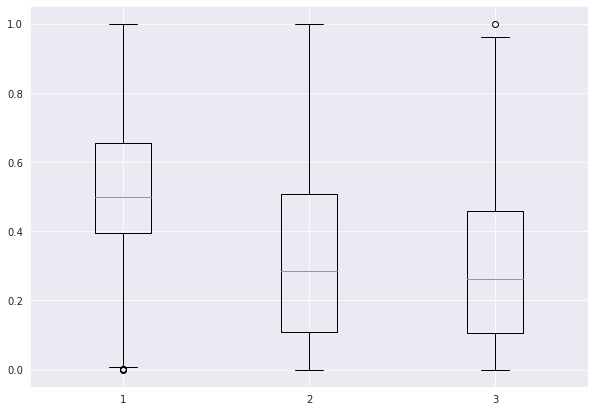

In [16]:
from functions import bar_plot
bar_plot(x_train, "bar_plot")


## Linear Regression for all positions <a class="anchor" id="section4"></a>

In [17]:
import statsmodels.api as sm
vcvtype = 'nonrobust'

X = x_train

X = sm.add_constant(X)
Y = y_train

# Regression 
model = sm.OLS(Y, X.astype(float))
results = model.fit(cov_type=vcvtype)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Incidents_per_1000   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     5.285
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00157
Time:                        21:17:30   Log-Likelihood:                -13.104
No. Observations:                 209   AIC:                             34.21
Df Residuals:                     205   BIC:                             47.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Visualization linear relationship <a class="anchor" id="4_1"></a>

In [18]:
from functions import scatter_plot
#scatter_plot(df,'First_Aid_Incident_percentage_120d','Incidents_per_1000')


In [19]:
# from functions import pairplot
# pairplot(x_train_shift, df_shift, 0, 4)





### Formula <a class="anchor" id="4_2"></a>

Dependent_Variable (Y_i) = intercept +  independent variable  + random error term
Incidents_per_100 = add all independent variable 

y = b_0 + b_1*x_1 + b2*x2 + ...

### Model <a class="anchor" id="4_3"></a>

LinearRegression()

 Feature 0: Working_Days_per_month_120d,
 Score: 0.20099
 Feature 1: Day_120d,
 Score: 0.4602
 Feature 2: Night_120d,
 Score: -0.44415


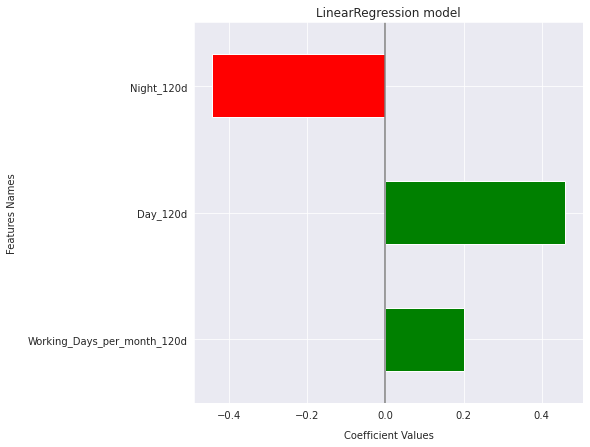

R-squared: 2.052 %
Mean Absolute Error (MAE): 0.18
Mean Squared Error (MSE): 0.059
Root Mean Squared Error (RMSE): 0.243


In [20]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

#this is to import the function from the functions.py file
from functions import feature_importance

# define the model
linreg = LinearRegression()

# fit the model
linreg.fit(x_train, y_train)

#get intercept
intercept = linreg.intercept_

#feature importance
feature_importance(linreg,x_train)

#model predictions
pred_linreg = linreg.predict(x_test)

#model evaluation
r2_score_linreg = linreg.score(x_test,y_test)
print("R-squared:",round(r2_score_linreg*100,3),'%')
MAE_linreg =  round(mean_absolute_error(y_test,pred_linreg),3)
print("Mean Absolute Error (MAE):",MAE_linreg)
MSE_linreg = round(mean_squared_error(y_test,pred_linreg),3)
print("Mean Squared Error (MSE):",MSE_linreg )
RMSE_linreg = round(np.sqrt(mean_squared_error(y_test,pred_linreg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_linreg)



In [21]:
#import from functions.py file the specific function
from functions import adding_to_df

# empty dataframe to add all the evaluation values
df_evaluation_score = pd.DataFrame()

# Updating the Evaluation score table
df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'r2_score_linreg',r2_score_linreg)

df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'RMSE_linreg', RMSE_linreg)

df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'MAE_linreg',MAE_linreg)

df_evaluation_score = adding_to_df(df_evaluation_score,'Linear Regression',
                                   'MSE_linreg',MSE_linreg)

df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000


**MAE:** The easiest to understand. Represents average error <br>
**MSE:** Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular. <br>
**RMSE:** Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model. <br>



### Ridge Regression all positions <a class="anchor" id="4_4"></a>

Ridge(alpha=0.01)

 Feature 0: Working_Days_per_month_120d,
 Score: 0.20055
 Feature 1: Day_120d,
 Score: 0.45732
 Feature 2: Night_120d,
 Score: -0.44119


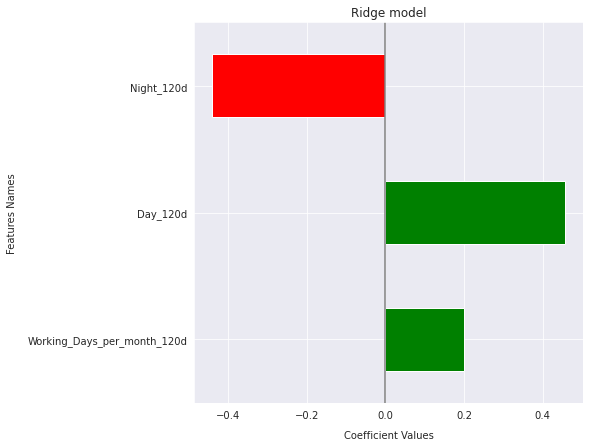

R-squared: 2.004 %
Root Mean Squared Error (RMSE): 0.243


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

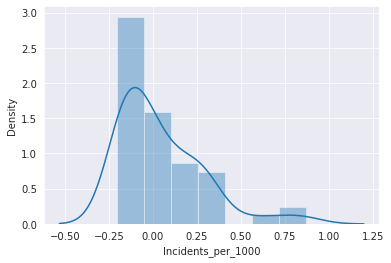

In [22]:
from sklearn.linear_model import Ridge

# define model
ridge = Ridge(alpha=0.01)

#fit the model
ridge.fit(x_train,y_train)

#feature importance
feature_importance(ridge,x_train)

#model prediction
pred_ridge = ridge.predict(x_test)

#model evaluation
r2_score_ridge = ridge.score(x_test,y_test)
print("R-squared:",round(r2_score_ridge*100,3),'%')

RMSE_ridge = round(np.sqrt(mean_squared_error(y_test,pred_ridge)),3)
print("Root Mean Squared Error (RMSE):",RMSE_ridge)

sns.distplot(y_test-pred_ridge)



We are getting nearly bell shape curve that means our model working good? No we can't make that conclusion. Good bell curve only tell us the range of predicted values are with in the same range as our original data range values are.

In [23]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Ridge Regression',
                                   'r2_score_ridge',r2_score_ridge)
df_evaluation_score = adding_to_df(df_evaluation_score,'Ridge Regression',
                                   'RMSE_ridge',RMSE_ridge)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000


RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 1.e+01]))

Alpha chosen by RidgeCV: 0.01
 Feature 0: Working_Days_per_month_120d,
 Score: 0.20055
 Feature 1: Day_120d,
 Score: 0.45732
 Feature 2: Night_120d,
 Score: -0.44119


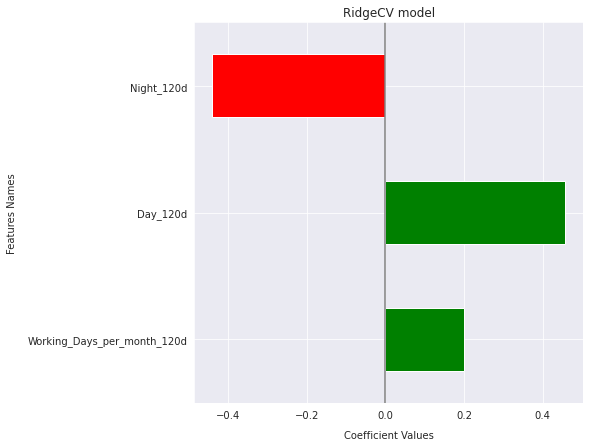

R-squared: 2.004 %
Root Mean Squared Error (RMSE): 0.243


In [24]:
#ridgeCV is cross validation method in ridge regression
from sklearn.linear_model import RidgeCV

#define the model 
ridge_cv = RidgeCV(alphas=[0.0001,0.001,0.01,1,10])

#fit the model 
ridge_cv.fit(x_train,y_train)
print('Alpha chosen by RidgeCV:',ridge_cv.alpha_) 

#feature importance
feature_importance(ridge_cv,x_train)

#model prediction
pred_ridge_cv = ridge_cv.predict(x_test)

#model evaluation
r2_score_ridge_cv = ridge_cv.score(x_test,y_test)
print("R-squared:",round(r2_score_ridge_cv*100,3),'%')
RMSE_ridge_cv = round(np.sqrt(mean_squared_error(y_test,pred_ridge_cv)),3)
print("Root Mean Squared Error (RMSE):",RMSE_ridge_cv)


In [25]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Ridge Regression',
                                   'r2_score_ridge_cv',r2_score_ridge_cv)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Ridge Regression',
                                   'RMSE_ridge_cv',RMSE_ridge_cv)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000
6,Tuned Ridge Regression,r2_score_ridge_cv,0.020039
7,Tuned Ridge Regression,RMSE_ridge_cv,0.243000


### Lasso Regression all positions <a class="anchor" id="4_5"></a>

Lasso(alpha=0.01)

 Feature 0: Working_Days_per_month_120d,
 Score: 0.02609
 Feature 1: Day_120d,
 Score: 0.00328
 Feature 2: Night_120d,
 Score: 0.0


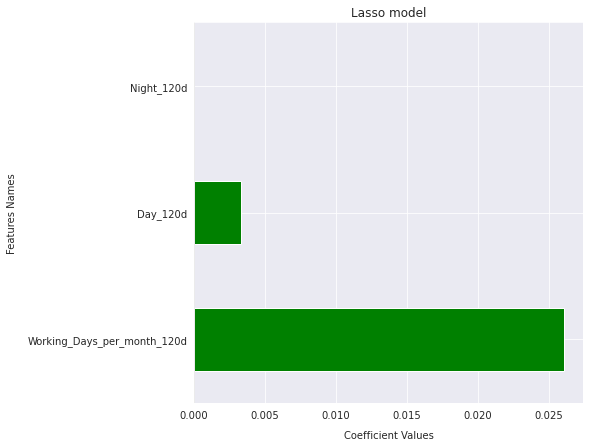

R-squared: -2.797 %
Root Mean Squared Error (RMSE): 0.248


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

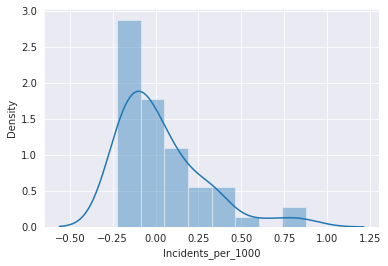

In [26]:
from sklearn.linear_model import Lasso

#define the model
lasso = Lasso(alpha=0.01)

#fit the model
lasso.fit(x_train, y_train) 

#feature importance
feature_importance(lasso,x_train)

#model prediction
pred_lasso = lasso.predict(x_test)

#model evaluation
r2_score_lasso = lasso.score(x_test,y_test)
print("R-squared:",round(r2_score_lasso*100,3),'%')

RMSE_lasso = round(np.sqrt(mean_squared_error(y_test,pred_lasso)),3)
print("Root Mean Squared Error (RMSE):",RMSE_lasso)

sns.distplot(y_test-pred_lasso)



In [27]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Lasso Regression',
                                   'r2_score_lasso',r2_score_lasso)
df_evaluation_score = adding_to_df(df_evaluation_score,'Lasso Regression',
                                   'RMSE_lasso',RMSE_lasso)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000
6,Tuned Ridge Regression,r2_score_ridge_cv,0.020039
7,Tuned Ridge Regression,RMSE_ridge_cv,0.243000
8,Lasso Regression,r2_score_lasso,-0.027965
9,Lasso Regression,RMSE_lasso,0.248000


LassoCV(cv=5, max_iter=10000, random_state=13)

Alpha chosen by LassoCV: 0.0004491843481942237
 Feature 0: Working_Days_per_month_120d,
 Score: 0.18006
 Feature 1: Day_120d,
 Score: 0.40536
 Feature 2: Night_120d,
 Score: -0.37721


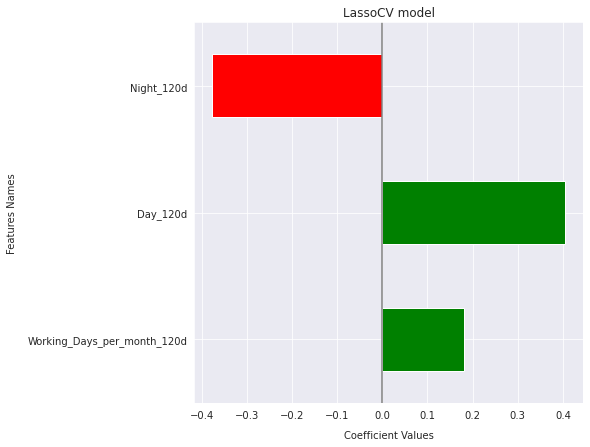

R-squared: 1.086 %
Root Mean Squared Error (RMSE): 0.244


In [28]:
#LassoCV is cross validation method in Lasso regression
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
lasso_cv = LassoCV(cv=5, random_state=13, max_iter=10000)

# Fit model
lasso_cv.fit(x_train, y_train)

# find the alpha chosen
print('Alpha chosen by LassoCV:',lasso_cv.alpha_)

#feature importance
feature_importance(lasso_cv,x_train)

#model prediction
pred_lasso_cv = lasso_cv.predict(x_test)

#model evaluation
r2_score_lasso_cv = lasso_cv.score(x_test,y_test)
print("R-squared:",round(r2_score_lasso_cv*100,3),'%')

RMSE_lasso_cv = round(np.sqrt(mean_squared_error(y_test,pred_lasso_cv)),3)
print("Root Mean Squared Error (RMSE):",RMSE_lasso_cv)


In [29]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Lasso Regression',
                                   'r2_score_lasso_cv',r2_score_lasso_cv)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned Lasso Regression',
                                   'RMSE_lasso_cv',RMSE_lasso_cv)
df_evaluation_score

,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000
6,Tuned Ridge Regression,r2_score_ridge_cv,0.020039
7,Tuned Ridge Regression,RMSE_ridge_cv,0.243000
8,Lasso Regression,r2_score_lasso,-0.027965
9,Lasso Regression,RMSE_lasso,0.248000


## Decision Tree Regressor for all positions <a class="anchor" id="section6"></a>

DecisionTreeRegressor(random_state=13)

 Feature 0: Working_Days_per_month_120d,
 Score: 0.19811
 Feature 1: Day_120d,
 Score: 0.3171
 Feature 2: Night_120d,
 Score: 0.48479


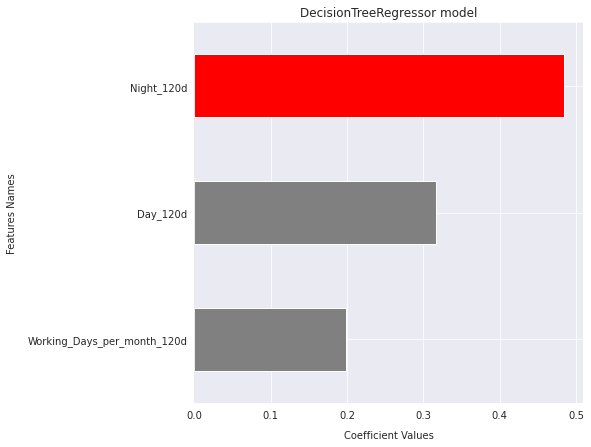

R-squared: -246.538 %
Root Mean Squared Error (RMSE): 0.456


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

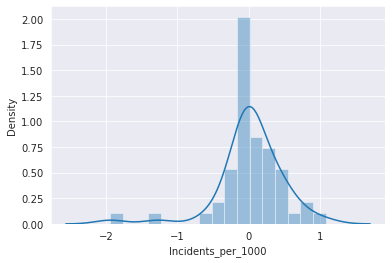

In [30]:
# decision tree for feature importance on a regression problem
from sklearn.tree import DecisionTreeRegressor
from functions import feature_importance_trees

# define the model
TreeReg = DecisionTreeRegressor(random_state=13)

# fit the model
TreeReg.fit(x_train, y_train)

#feature importance
feature_importance_trees(TreeReg,x_train)

#model predictions
pred_TreeReg =TreeReg.predict(x_test)

#model evaluation
r2_score_TreeReg = TreeReg.score(x_test,y_test)
print("R-squared:",round(r2_score_TreeReg*100,3),'%')
RMSE_TreeReg = round(np.sqrt(mean_squared_error(y_test,pred_TreeReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_TreeReg)

#checking difference between labled y and predicted y
sns.distplot(y_test-pred_TreeReg)


### Hyperparameter tuning  <a class="anchor" id="6_1"></a>

In [31]:
# Hyper parameters range intialization for tuning using GridSearch
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5,6],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60] }

In [32]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(TreeReg,param_grid=parameters,
                          scoring='neg_mean_squared_error',
                          cv=3,verbose=3)

In [33]:
%%capture
from datetime import datetime

start_time = datetime.now()

tuning_model.fit(x_train, y_train)

end_time = datetime.now()


In [34]:
#calculate the time it took the model for the GridSearchCV
total_time_TreeReg = end_time - start_time
print('Duration: {}'.format(total_time_TreeReg))

Duration: 0:01:45.029440


In [35]:
# best hyperparameters 
params = tuning_model.best_params_

# best model score
tuning_model.best_score_

-0.07327834162725466

In [36]:
params

{'max_depth': 3,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

DecisionTreeRegressor(max_depth=3, max_features='log2',
                      min_weight_fraction_leaf=0.1, random_state=13,
                      splitter='random')

 Feature 0: Working_Days_per_month_120d,
 Score: 0.0
 Feature 1: Day_120d,
 Score: 1.0
 Feature 2: Night_120d,
 Score: 0.0


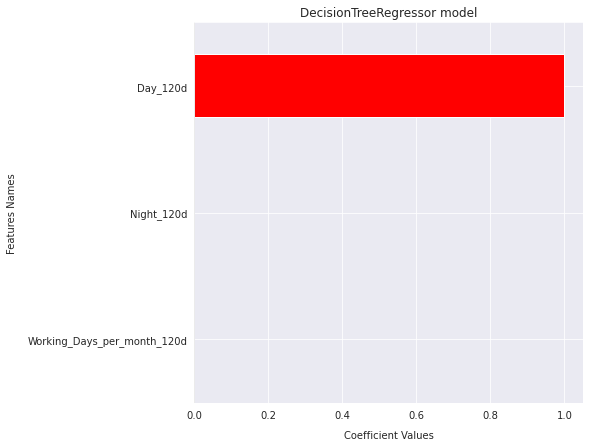

R-squared: 4.231 %
Root Mean Squared Error (RMSE): 0.24


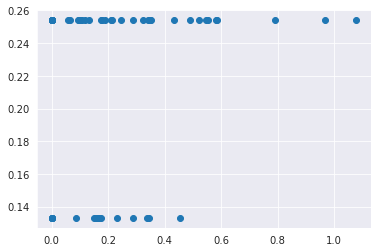

In [37]:
# define the new model after hyperparameters tuning
tuned_TreeReg=DecisionTreeRegressor(max_depth=list(params.values())[0],
                                        max_features=list(params.values())[1],
                                        max_leaf_nodes=list(params.values())[2],
                                        min_samples_leaf=list(params.values())[3],
                                        min_weight_fraction_leaf=list(params.values())[4],
                                        splitter=list(params.values())[5],
                                       random_state=13)

#fitting model
tuned_TreeReg.fit(x_train,y_train)

#feature importance
feature_importance_trees(tuned_TreeReg,x_train)

#model prediction 
tuned_pred_TreeReg= tuned_TreeReg.predict(x_test)

#model evaluation with hyperparameter tuned 
r2_score_tuned_TreeReg = tuned_TreeReg.score(x_test,y_test)
print("R-squared:",round(r2_score_tuned_TreeReg*100,3),'%')
RMSE_tuned_TreeReg = round(np.sqrt(mean_squared_error(y_test,tuned_pred_TreeReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_TreeReg)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))

#scatter plot
plt.scatter(y_test,tuned_pred_TreeReg)


In [38]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned DecisionTree Regressor',
                                   'r2_score_tuned_TreeReg',r2_score_tuned_TreeReg)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned DecisionTree Regressor',
                                   'RMSE_tuned_TreeReg',RMSE_tuned_TreeReg)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000
6,Tuned Ridge Regression,r2_score_ridge_cv,0.020039
7,Tuned Ridge Regression,RMSE_ridge_cv,0.243000
8,Lasso Regression,r2_score_lasso,-0.027965
9,Lasso Regression,RMSE_lasso,0.248000


|--- feature_1 <= 0.16
|   |--- value: [0.13]
|--- feature_1 >  0.16
|   |--- value: [0.25]



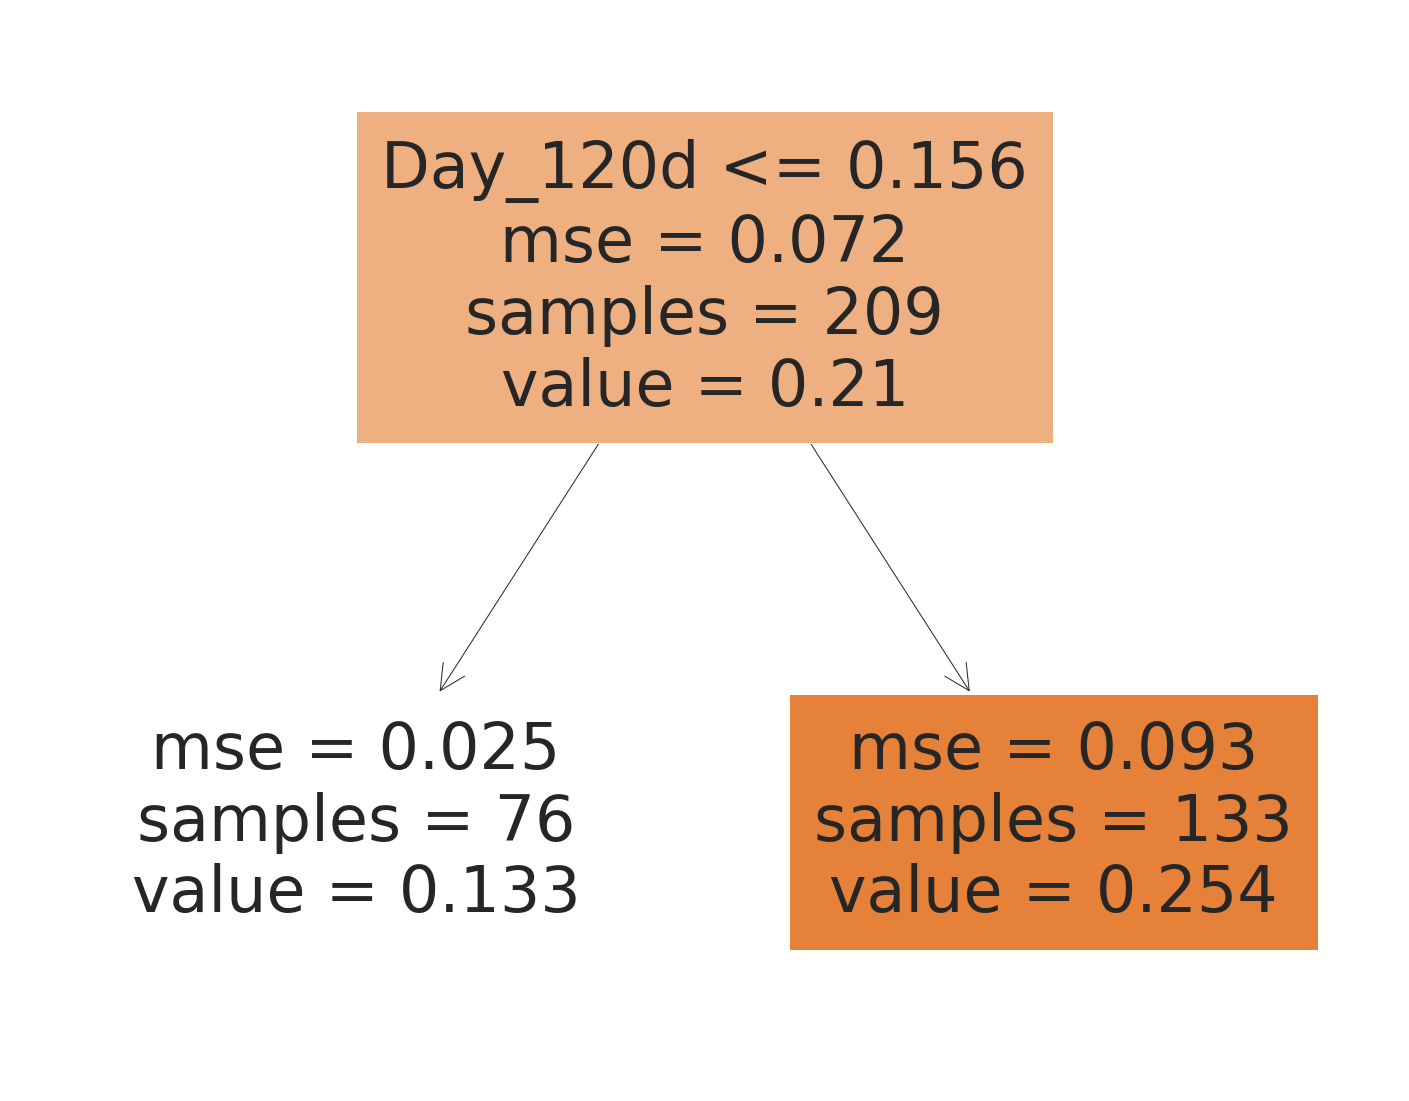

In [39]:
#visualise the decision tree
from sklearn import tree
text_representation = tree.export_text(tuned_TreeReg)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tuned_TreeReg, feature_names=df_shift.columns.values, filled=True)


## Random Forest Regressor for all positions <a class="anchor" id="section8"></a>

RandomForestRegressor(n_estimators=10, random_state=13)

 Feature 0: Working_Days_per_month_120d,
 Score: 0.33664
 Feature 1: Day_120d,
 Score: 0.3007
 Feature 2: Night_120d,
 Score: 0.36266


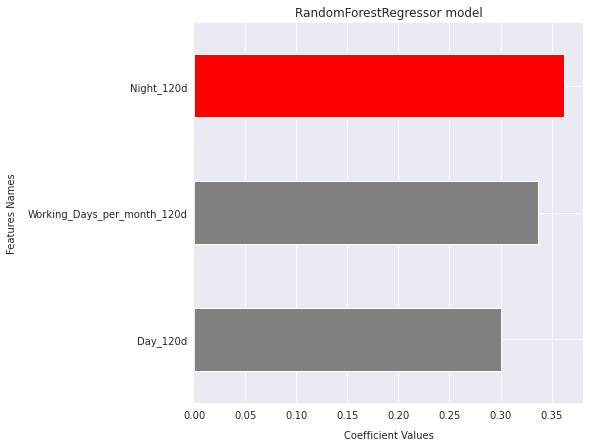

R-squared: -26.81 %
Root Mean Squared Error (RMSE): 0.276


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

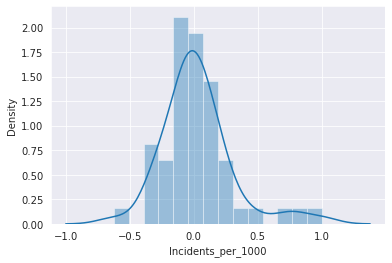

In [40]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor

# define the model
RandForestReg = RandomForestRegressor(n_estimators = 10, random_state = 13)

# fit the model
RandForestReg.fit(x_train, y_train)

#feature importance
feature_importance_trees(RandForestReg,x_train)

#model predictions
pred_RandForestReg =RandForestReg.predict(x_test)

#model evaluation
r2_score_RandForestReg = RandForestReg.score(x_test,y_test)
print("R-squared:",round(r2_score_RandForestReg*100,3),'%')
RMSE_RandForestReg = round(np.sqrt(mean_squared_error(y_test,pred_RandForestReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_RandForestReg)

#checking difference between labled y and predicted y
sns.distplot(y_test-pred_RandForestReg)



### Hyperparameter tuning  <a class="anchor" id="8_1"></a>

In [41]:
# Hyper parameters range intialization for tuning using RandomizedSearchCV
parameters = {'n_estimators': [50, 80, 100, 200, 400, 600],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [6, 8, 10, 12, 14],
               'bootstrap': [True, False]}


In [42]:
from sklearn.model_selection import RandomizedSearchCV

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores (-1)
tuning_RandForestReg = RandomizedSearchCV(estimator = RandForestReg, 
                               param_distributions = parameters, 
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=13, n_jobs = -1)



In [43]:
%%capture
from datetime import datetime

start_time = datetime.now()

# Fit the random search model
tuning_RandForestReg.fit(x_train, y_train)

end_time = datetime.now()


In [44]:
#calculate the time it took the model for the GridSearchCV
total_time_RandForestReg = end_time - start_time
print('Duration: {}'.format(total_time_RandForestReg))

Duration: 0:00:23.395364


In [45]:
# best hyperparameters 
params = tuning_RandForestReg.best_params_

# best model score
tuning_RandForestReg.best_score_

-0.12130079068511564

In [46]:
params

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 14,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=14,
                      min_samples_split=10, random_state=13)

 Feature 0: Working_Days_per_month_120d,
 Score: 0.32489
 Feature 1: Day_120d,
 Score: 0.29593
 Feature 2: Night_120d,
 Score: 0.37919


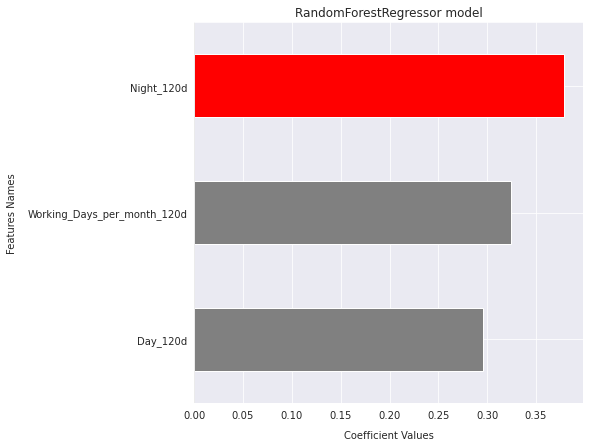

R-squared: 3.547 %
Root Mean Squared Error (RMSE): 0.241


In [47]:
# define the new model after hyperparameters tuning
tuned_RandForestReg=RandomForestRegressor(n_estimators=list(params.values())[0],
                                          min_samples_split=list(params.values())[1],
                                          min_samples_leaf=list(params.values())[2],
                                          max_features=list(params.values())[3],
                                          max_depth=list(params.values())[4],
                                          bootstrap=list(params.values())[5],
                                          random_state=13)

#fitting model
tuned_RandForestReg.fit(x_train,y_train)

#feature importance
feature_importance_trees(tuned_RandForestReg,x_train)

#model prediction 
tuned_pred_RandForestReg = tuned_RandForestReg.predict(x_test)

#model evaluation with hyperparameter tuned 
r2_score_tuned_RandForestReg = tuned_RandForestReg.score(x_test,y_test)
print("R-squared:",round(r2_score_tuned_RandForestReg*100,3),'%')
RMSE_tuned_RandForestReg = round(np.sqrt(mean_squared_error(y_test,tuned_pred_RandForestReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_RandForestReg)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))



In [48]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned RandomForest Regressor',
                                   'r2_score_tuned_RandForestReg',r2_score_tuned_RandForestReg)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned RandomForest Regressor',
                                   'RMSE_tuned_RandForestReg',RMSE_tuned_RandForestReg)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000
6,Tuned Ridge Regression,r2_score_ridge_cv,0.020039
7,Tuned Ridge Regression,RMSE_ridge_cv,0.243000
8,Lasso Regression,r2_score_lasso,-0.027965
9,Lasso Regression,RMSE_lasso,0.248000


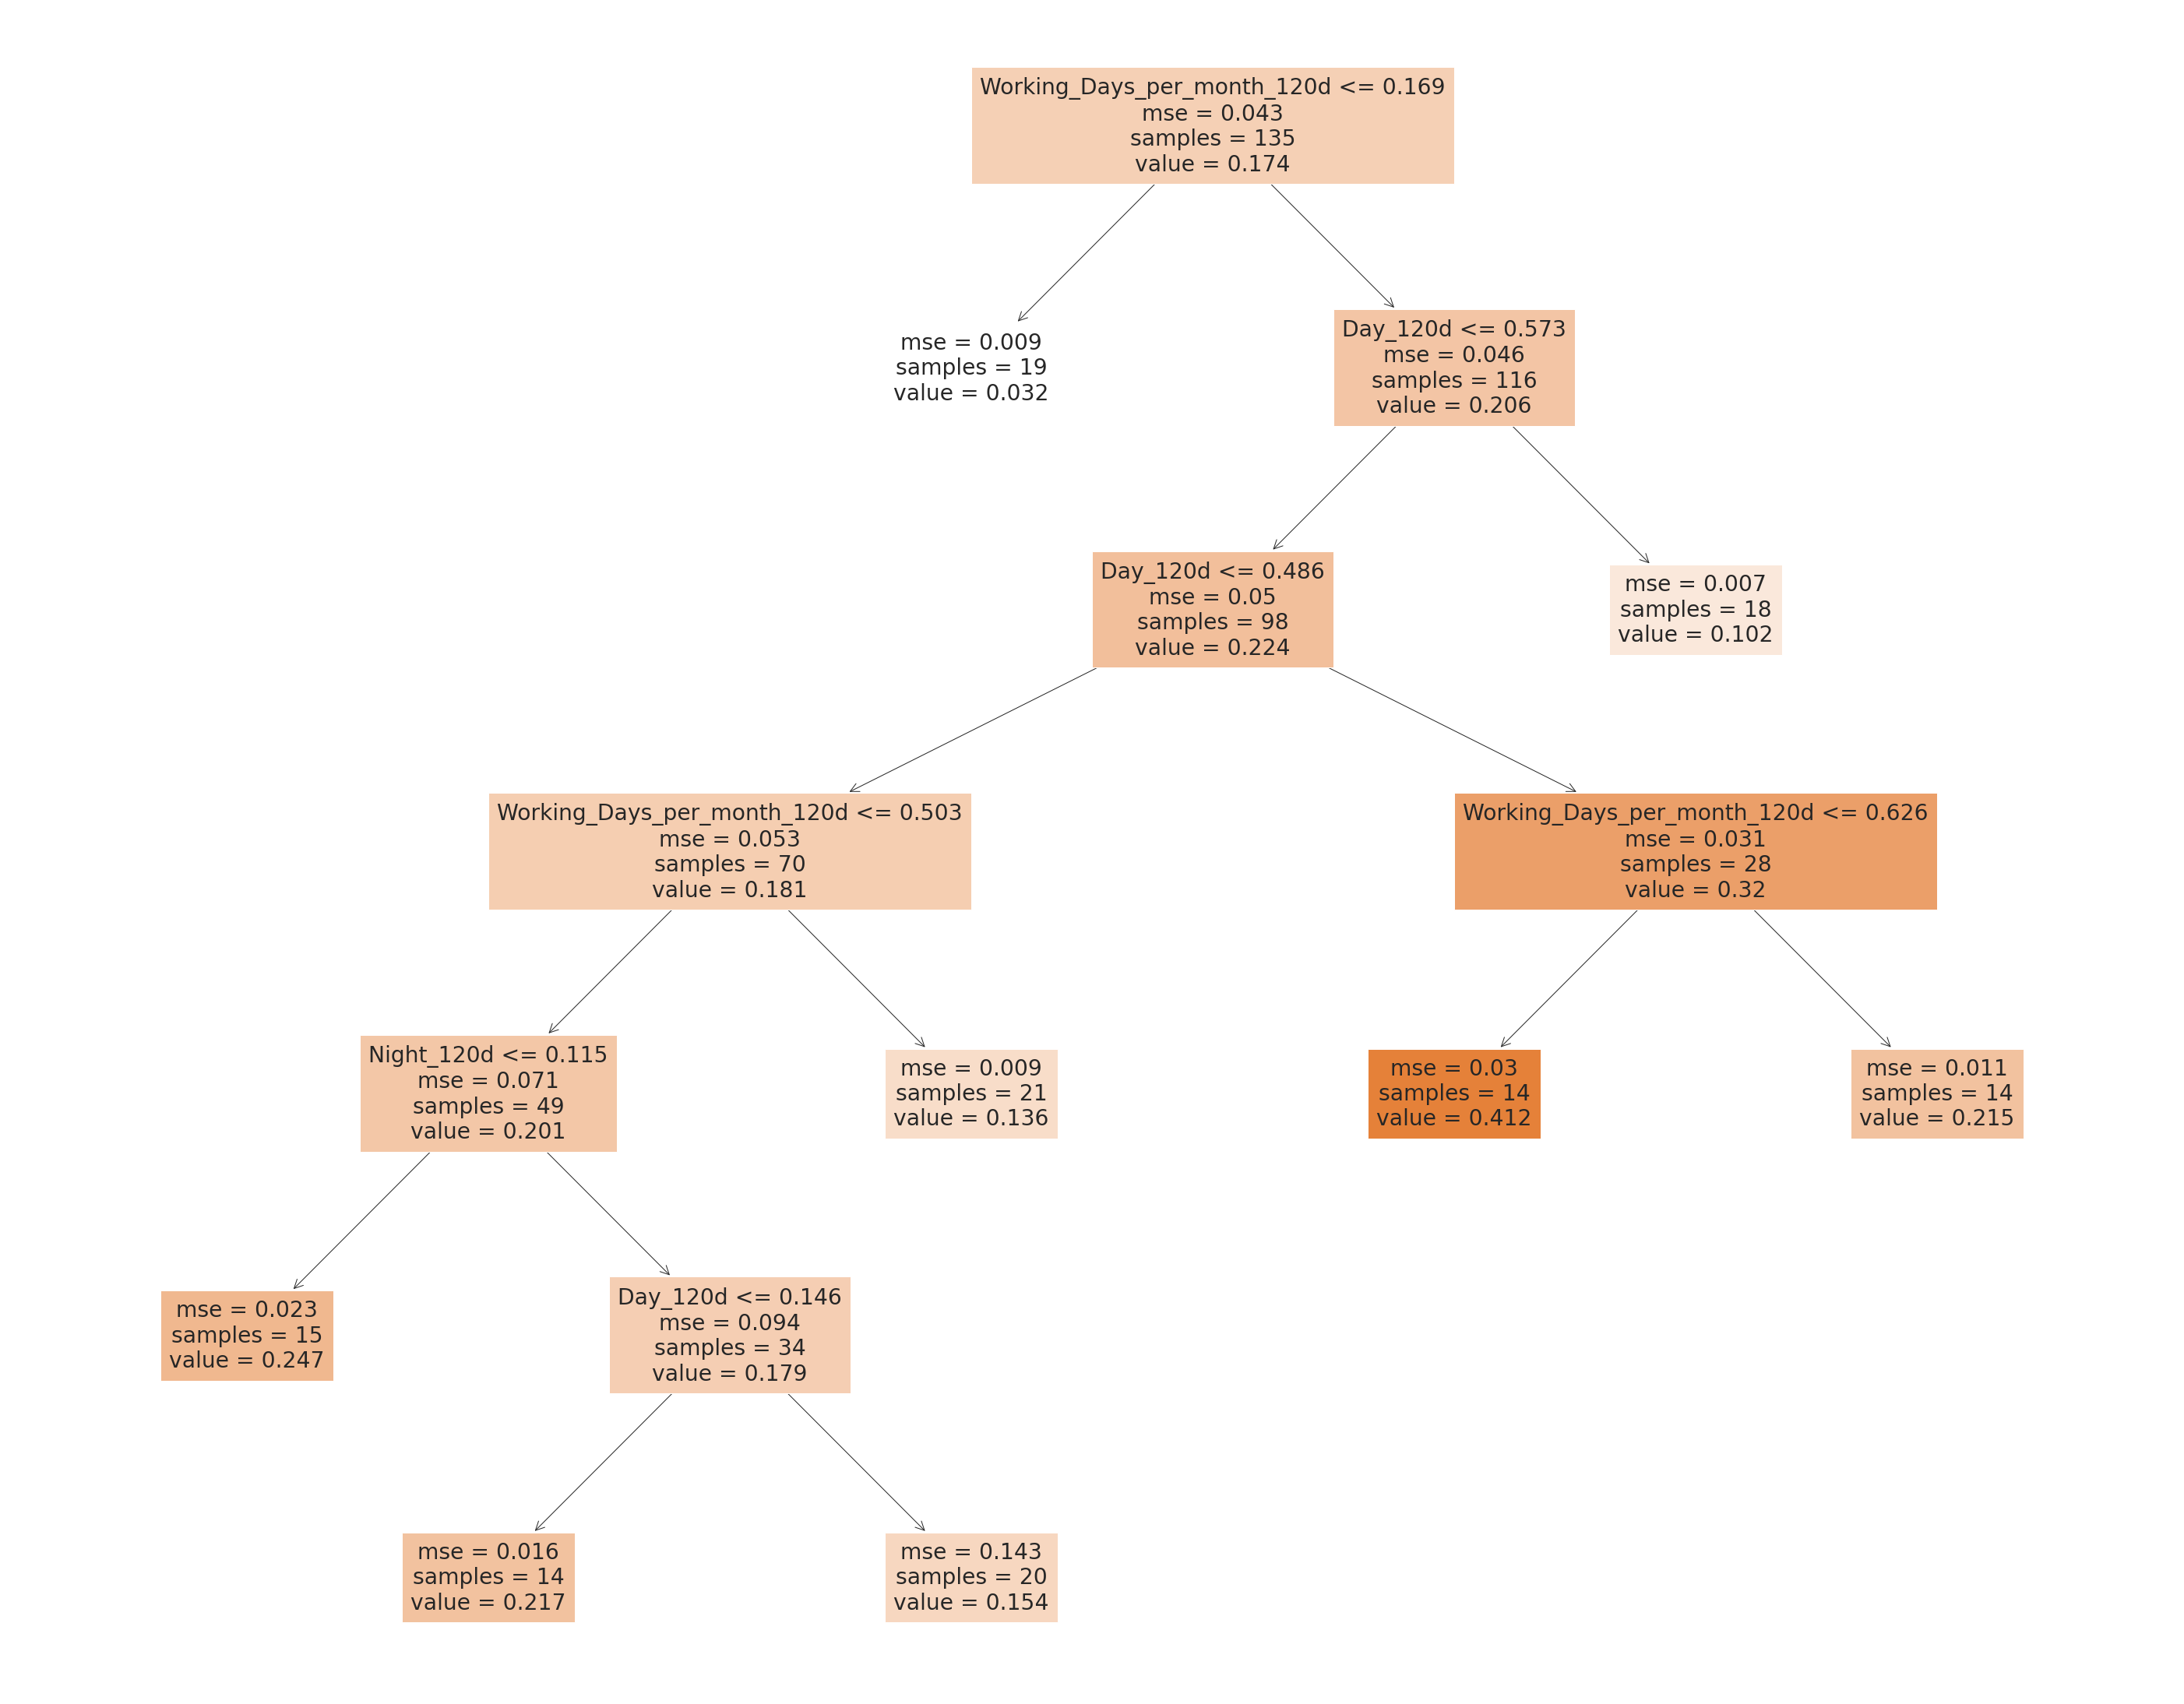

In [49]:
#visualise the random forest tree
from sklearn import tree

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(tuned_RandForestReg.estimators_[0], filled=True, feature_names=df_shift.columns.values)



## XGBoost for all positions <a class="anchor" id="section10"></a>

In [50]:
%%capture
!pip install xgboost

In [51]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.6.1


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=13,
             reg_alpha=0, reg_lambda=1, ...)

 Feature 0: Working_Days_per_month_120d,
 Score: 0.2222599983215332
 Feature 1: Day_120d,
 Score: 0.2806900143623352
 Feature 2: Night_120d,
 Score: 0.4970499873161316


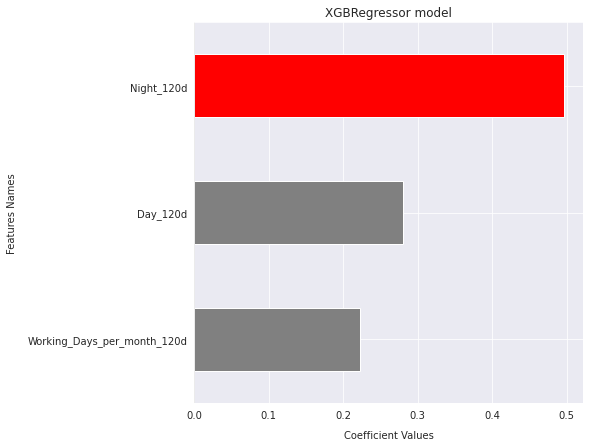

R-squared: -30.386 %
Root Mean Squared Error (RMSE): 0.28


<AxesSubplot:xlabel='Incidents_per_1000', ylabel='Density'>

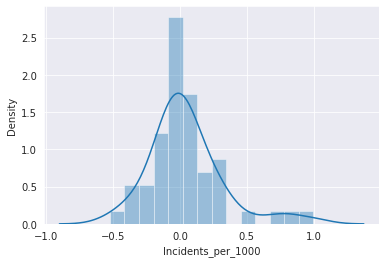

In [52]:
# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor

# define the model
XGBReg = XGBRegressor(random_state=13, objective='reg:squarederror')

# fit the model
XGBReg.fit(x_train, y_train)

#feature importance
feature_importance_trees(XGBReg,x_train)

#model predictions
pred_XGBReg = XGBReg.predict(x_test)

#model evaluation
r2_score_XGBReg = XGBReg.score(x_test,y_test)
print("R-squared:",round(r2_score_XGBReg*100,3),'%')
RMSE_XGBReg = round(np.sqrt(mean_squared_error(y_test,pred_XGBReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_XGBReg)

#checking difference between labled y and predicted y
sns.distplot(y_test-pred_XGBReg)


### Hyperparameter tuning <a class="anchor" id="10_1"></a>

In [53]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

In [54]:
tuning_XGBReg = GridSearchCV(estimator=XGBReg, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1, cv=2, n_jobs = -1)

In [55]:
%%capture
from datetime import datetime

start_time = datetime.now()

# Fit the random search model
tuning_XGBReg.fit(x_train, y_train)

end_time = datetime.now()


In [56]:
#calculate the time it took the model for the GridSearchCV
total_time_XGBReg = end_time - start_time
print('Duration: {}'.format(total_time_XGBReg))

Duration: 0:44:20.230523


In [57]:
# best hyperparameters 
params = tuning_XGBReg.best_params_

# best model score
tuning_XGBReg.best_score_

-0.10813660856972418

In [58]:
params

{'colsample_bytree': 0.3,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100}

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=13,
             reg_alpha=0, reg_lambda=1, ...)

 Feature 0: Working_Days_per_month_120d,
 Score: 0.32357001304626465
 Feature 1: Day_120d,
 Score: 0.36702999472618103
 Feature 2: Night_120d,
 Score: 0.30939000844955444


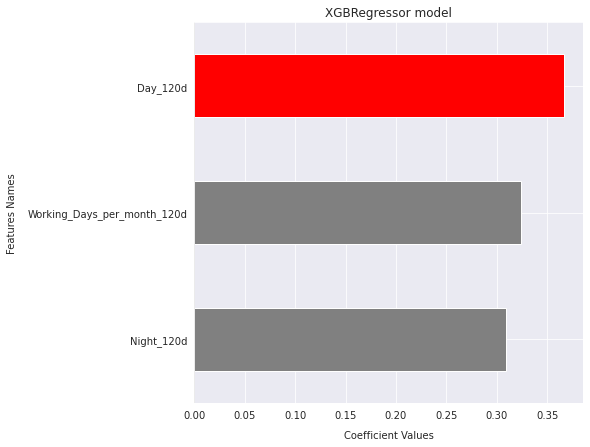

R-squared: -3.711 %
Root Mean Squared Error (RMSE): 0.25


In [59]:
# define the new model after hyperparameters tuning
tuned_XGBReg = XGBRegressor(colsample_bytree=list(params.values())[0],
                                          learning_rate=list(params.values())[1],
                                          max_depth=list(params.values())[2],
                                          n_estimators=list(params.values())[3],                              
                                          random_state=13)

#fitting model
tuned_XGBReg.fit(x_train,y_train)

#feature importance
feature_importance_trees(tuned_XGBReg,x_train)

#model prediction 
tuned_pred_XGBReg = tuned_XGBReg.predict(x_test)

#model evaluation with hyperparameter tuned 
r2_score_tuned_XGBReg = tuned_XGBReg.score(x_test,y_test)
print("R-squared:",round(r2_score_tuned_XGBReg*100,3),'%')
RMSE_tuned_XGBReg = round(np.sqrt(mean_squared_error(y_test,tuned_pred_XGBReg)),3)
print("Root Mean Squared Error (RMSE):",RMSE_tuned_XGBReg)

#print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred_tree_reg))
#print('MSE:', metrics.mean_squared_error(y_test, tuned_pred_tree_reg))



In [60]:
# Updating the evaluation score table 
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned XGBoost Regressor',
                                   'r2_score_tuned_XGBReg',r2_score_tuned_XGBReg)
df_evaluation_score = adding_to_df(df_evaluation_score,'Tuned XGBoost Regressor',
                                   'RMSE_tuned_XGBReg',RMSE_tuned_XGBReg)
df_evaluation_score



,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000
6,Tuned Ridge Regression,r2_score_ridge_cv,0.020039
7,Tuned Ridge Regression,RMSE_ridge_cv,0.243000
8,Lasso Regression,r2_score_lasso,-0.027965
9,Lasso Regression,RMSE_lasso,0.248000


In [61]:
all_positions_evaluation = df_evaluation_score[~df_evaluation_score.Model.str.endswith('RM')]
r2 = all_positions_evaluation[all_positions_evaluation['Evaluation_Name'].str.startswith('r2')]
RMSE = all_positions_evaluation[all_positions_evaluation['Evaluation_Name'].str.startswith('RMSE')]

all_positions_evaluation
r2.loc[r2['score'] == r2['score'].max()]
RMSE.loc[RMSE['score'] == RMSE['score'].min()]


,Model,Evaluation_Name,score
0,Linear Regression,r2_score_linreg,0.020524
1,Linear Regression,RMSE_linreg,0.243000
2,Linear Regression,MAE_linreg,0.180000
3,Linear Regression,MSE_linreg,0.059000
4,Ridge Regression,r2_score_ridge,0.020039
5,Ridge Regression,RMSE_ridge,0.243000
6,Tuned Ridge Regression,r2_score_ridge_cv,0.020039
7,Tuned Ridge Regression,RMSE_ridge_cv,0.243000
8,Lasso Regression,r2_score_lasso,-0.027965
9,Lasso Regression,RMSE_lasso,0.248000


,Model,Evaluation_Name,score
12,Tuned DecisionTree Regressor,r2_score_tuned_TreeReg,0.042306


,Model,Evaluation_Name,score
13,Tuned DecisionTree Regressor,RMSE_tuned_TreeReg,0.24


## Voting Regressor for all positions <a class="anchor" id="section12"></a>

Apart form Grid Search, another way to fine-tune the models is to combine the ones which performed better. Therefore, the voting regressor tends to perform better.

In [62]:
from sklearn.ensemble import VotingRegressor

# current models
reg1 = linreg
reg2 = ridge_cv
reg3 = lasso_cv
reg4 = tuned_TreeReg
reg5 = tuned_RandForestReg
reg6 = tuned_XGBReg
    
#voting regressor model   
vregressor = VotingRegressor([("lr", linreg), ("rg", ridge_cv), 
                              ("ls", lasso_cv), ("tr", tuned_TreeReg),
                              ("rf", tuned_RandForestReg),
                              ("xgb", tuned_XGBReg)])

#fit the model 
vregressor.fit(x_train, y_train)    
    
#model prediction 
pred_voting = vregressor.predict(x_test)


# r2_score_voting = vregressor.score(x_test,y_test)
# print("R-squared:",round(r2_score_voting*100,3),'%')
RMSE_voting = round(np.sqrt(mean_squared_error(y_test,pred_voting)),3)
print("Root Mean Squared Error (RMSE):",RMSE_voting)

#model evaluation with hyperparameter tuned 
for regressor, label in zip([reg1, reg2, reg3, reg4, reg5, reg6, vregressor], 
                            ['Linear Regression', 'Ridge','Lasso', 
                             'Decision Tree', 'Random Forest','XGBoost', 
                             'Voting Regressor']):
    scores = regressor.score(x_test,y_test)
    print("R-squared: %0.3f [%s]" % (scores*100, label))



    

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rg',
                             RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 1.e+01]))),
                            ('ls',
                             LassoCV(cv=5, max_iter=10000, random_state=13)),
                            ('tr',
                             DecisionTreeRegressor(max_depth=3,
                                                   max_features='log2',
                                                   min_weight_fraction_leaf=0.1,
                                                   random_state=13,
                                                   splitter='random')),
                            ('rf',
                             RandomForestRegressor(max_depth=10,
                                                   max_feature...
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwis

Root Mean Squared Error (RMSE): 0.238
R-squared: 2.052 [Linear Regression]
R-squared: 2.004 [Ridge]
R-squared: 1.086 [Lasso]
R-squared: 4.231 [Decision Tree]
R-squared: 3.547 [Random Forest]
R-squared: -3.711 [XGBoost]
R-squared: 6.010 [Voting Regressor]


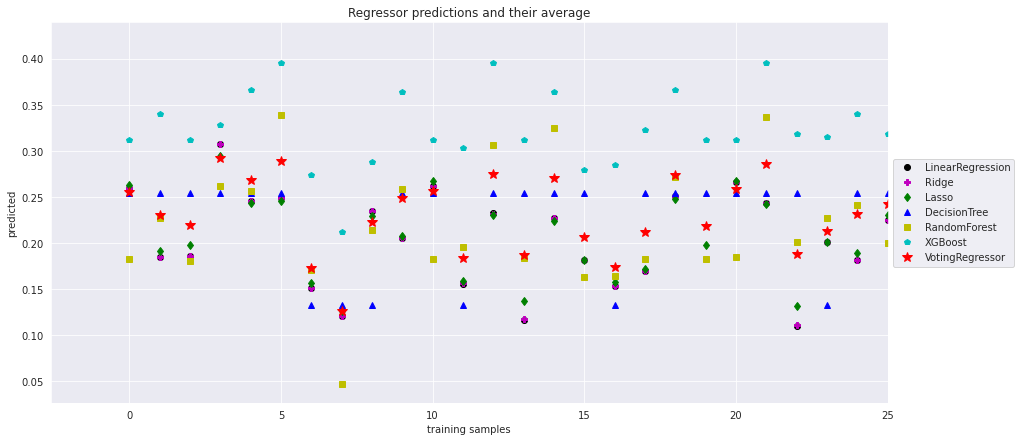

In [63]:
plt.figure(figsize =(15, 7))
plt.plot(pred_linreg, "ko", label="LinearRegression")
plt.plot(pred_ridge_cv, "mP", label="Ridge")
plt.plot(pred_lasso_cv, "gd", label="Lasso")
plt.plot(tuned_pred_TreeReg, "b^", label="DecisionTree")
plt.plot(tuned_pred_RandForestReg, "ys", label="RandomForest")
plt.plot(tuned_pred_XGBReg, "cp", label="XGBoost")
plt.plot(pred_voting, "r*", ms=10, label="VotingRegressor")


plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=True)
plt.ylabel("predicted")
plt.xlabel("training samples")
#plt.legend(loc="right")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(right=25)
plt.title("Regressor predictions and their average")

plt.show();

Above is a visualisation of the 25 first predictions. The red stars demonstrate the average prediction made by the Voting Regressor. We can observe that the two models with the best results are both Random Forest and Decision Tree.

In [64]:
df_shift_new = df_shift.groupby(["month_year"]).sum().reset_index()
df_shift_new = df_shift_new.sort_values(by=['Incidents_per_1000'])
df_shift_new

KeyError: 'month_year'

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_shift_new["Incidents_per_1000"], df_shift_new["Day_120d"])
plt.plot(df_shift_new["Incidents_per_1000"], df_shift_new["Night_120d"])
#plt.plot(df_shift_new["month_year"], df_shift_new["Incidents_per_1000"])

_ = plt.xlabel("Incident Dates")
_ = plt.ylabel("Count")
_ = plt.title("Count of HSE Incidents", fontweight='bold', fontsize=14)
_ = plt.xticks(rotation=-20)
